# Producto Integrador de Aprendizaje <img src="fcfm.png" style="width: 80px;" style="float: right;"  align="right"  margin-right= "50px"/>

031 A2023 Estadística 

Dr. Álvaro Eduardo Cordero Franco

Ismael Sandoval Aguilar 

26 de noviembre de 2023

### Situación problema

Narula y Wellington (1977) dan datos sobre precio de ventas de 28 casas en Erie, Pensilvania, a inicios de 1970, en donde agrega 11 posibles variables predictoras. Accese a los datos a través de la librería `HH`, `data("hpErie")`. Las variables son:

| Variable | Description                                    |
|----------|------------------------------------------------|
| price    | price in $100's                                |
| taxes    | taxes in dollars                               |
| bathrm   | number of bathrooms                            |
| lotsize  | lot size in square feet                        |
| sqfeet   | square footage of living space                 |
| garage   | number of cars for which there is garage space |
| rooms    | number of romos                                |
| bedrm    | number of bedrooms                             |
| age      | age in years                                   |
| type     | type of house                                  |
| style    | "2 story, 1.5 story, ranch"                   |
| fireplac | number of fireplaces                           |


Código para acceder a los datos:

In [21]:
# Libreria para cargar los datos
library("HH")

In [2]:
data <- data("hpErie")
df <- as.data.frame(hpErie)

head(df)

,price,taxes,bathrm,lotsize,sqfeet,garage,rooms,bedrm,age,type,style,fireplac
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<int>
1,259,492,1,3472,998,1,7,4,42,alum&frame,2.story,0
2,295,502,1,3531,1500,2,7,4,62,brick,2.story,0
3,279,454,1,2275,1175,1,6,3,40,brick&frame,2.story,0
4,259,456,1,4050,1232,1,6,3,54,frame,2.story,0
5,299,506,1,4455,1121,1,6,3,42,alum&frame,2.story,0
6,299,389,1,4455,988,1,6,3,56,brick&frame,2.story,0


#### 1.	Realice un ANOVA para comparar los promedios de los precios de las casas, bajo el factor `fireplac`

In [22]:
# Libreria para el anova
library(tidyverse)

In [4]:
# Creacion del anova
anova <- aov(df$price ~ df$fireplac, data = df)

Utilizaremos la prueba de Shapiro-Wilk para verificar la normalidad de los residuos del modelo con un nivel de significancia $\alpha = 0.05$.

In [5]:
# Prueba de Shapiro-Wilk
shapiro.test(residuals(anova))


	Shapiro-Wilk normality test

data:  residuals(anova)
W = 0.8258, p-value = 0.0003153


Ya que el p-valor es menor a $\alpha$, existe evidencia suficiente rechazar $H_0$. Es decir, los residuos del modelo no siguen una distribución normal. Ahora, utilizaremos la prueba de Levene para verificar la homocedasticidad del modelo con el mismo nivel de significancia de la prueba anterior.

In [23]:
# Libreria para la prueba de Levene
library(car)

In [7]:
# Prueba de Levene
leveneTest(df$price ~ factor(df$fireplac), data = df)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.978008,0.05668164
,26,NA,NA


En este caso, el p-valor es ligeramente superior a $\alpha$, por lo que existe evidencia para no rechazar $H_0$. Por lo tanto, es probable que todas las varianzas del modelo sean iguales. 

Si bien no se cumple uno de los supuestos, podemos continuar con el ANOVA ya que este modelo se considera robusto contra la normalidad. Se busca contrastar:

El promedio del precio de las casas el mismo:

- $H_0$: entre el número de chimeneas.

Al menos uno de los promedios del precio de las casas es diferente:

- $H_1$: entre el número de chimeneas.

Con un nivel de significancia $\alpha = 0.05$.

In [8]:
summary(anova)

            Df Sum Sq Mean Sq F value  Pr(>F)   
df$fireplac  1 129951  129951   8.217 0.00812 **
Residuals   26 411168   15814                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

De acuerdo a la tabla anterior, existe evidencia suficiente para decir que hay diferencias significativas en el precio promedio de las casas entre el número de chimeneas, pues el p-valor es menor a $\alpha$. Es decir, se rechaza la hipótesis nula.

#### 2.	Realice una regresión lineal de la variable precio contra 4 variables predictoras aleatorias, seguido de un Stepwise bajo el siguiente esquema (esto garantizará que no tengan el mismo modelo)

- Seleccione 4 variables al azar con la función `sample(11, 4)`. Los índices generados serán los de las variables a utilizar.

In [9]:
# Semilla arbitraria para replicabilidad
set.seed(100)

# Seleccion aleatoria sin tomar la variable dependiente
index_vec <- sample(seq(2, 12, by = 1), 4)

In [24]:
# Nombres de las columnas seleccionadas y tipo
paste(names(df[index_vec]), index_vec)
summary(df[index_vec])

[1] "style 11" "bedrm 8"  "rooms 7"  "age 9"

       style        bedrm           rooms             age       
 2.story  :24   Min.   :2.000   Min.   : 5.000   Min.   : 3.00  
 1.5.story: 2   1st Qu.:3.000   1st Qu.: 6.000   1st Qu.:30.00  
 ranch    : 2   Median :3.000   Median : 6.000   Median :36.00  
                Mean   :3.286   Mean   : 6.679   Mean   :36.32  
                3rd Qu.:4.000   3rd Qu.: 7.000   3rd Qu.:46.50  
                Max.   :5.000   Max.   :10.000   Max.   :62.00  

Las variables seleccionadas son `style`, `bedrm`, `rooms` y `age`.

- Utilice la función `lm` para realizar una regresión lineal múltiple con las 4 variables del primer inciso y concluya en forma estadística.

In [10]:
# Crea la formula como cadena y aplica sapply
predictors <- sapply(index_vec, function(i) paste0("unlist(df[", i, "])"))
formula_str <- paste("df$price ~", paste(predictors, collapse = " + "))

# Crea el modelo lineal inicial
initial_lm <- lm(as.formula(formula_str), data = df)

In [11]:
# Libreria para el modelo Stepwise
library(MASS)

In [12]:
# Modelo de regresion Stepwise y resultados
step_model <- stepAIC(initial_lm, direction = "both",
                      trace = FALSE)
summary(step_model)


Call:
lm(formula = df$price ~ unlist(df[7]) + unlist(df[9]), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-148.50  -41.37  -17.51   50.53  167.94 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -141.986     99.347  -1.429  0.16533    
unlist(df[7])   95.565     13.436   7.113 1.87e-07 ***
unlist(df[9])   -3.157      1.125  -2.808  0.00954 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 80.73 on 25 degrees of freedom
Multiple R-squared:  0.6989,	Adjusted R-squared:  0.6748 
F-statistic: 29.01 on 2 and 25 DF,  p-value: 3.047e-07


De acuerdo a los resultados anteriores, el modelo de regresión lineal es el siguiente:

$Y = -141.986 + 95.565X_1 - 3.157X_2$

con un $R^2$ ajustada de $0.674$, es decir, el $67\%$ de la varianza de la variable dependiente puede ser explicada mediante las variables incluidas en el modelo. Además, nótese que se rechazan las hipótesis nulas de $X_1$ y $X_2$ (con un nivel de significancia $\alpha=0.05$), por lo que existe evidencia suficiente para concluir que las variables `room` y `age` tienen un efecto significativo en el modelo.

- Haga una matriz de correlación entre la variable `price` contra las 4 variables del inciso primer inciso.

In [14]:
# Conversion de las variables categoricas a dummy
df_dummy <- model.matrix(~ style - 1, data = df)
df_for_cor <- cbind(df, df_dummy)

In [15]:
# Matriz de correlacion
selected_vars <- c("price", "age", "bedrm", "rooms", colnames(df_dummy))
corr_matrix <- cor(df_for_cor[selected_vars], use = "complete.obs")

In [25]:
# Librerias para graficar
library(ggplot2)
library(corrplot)

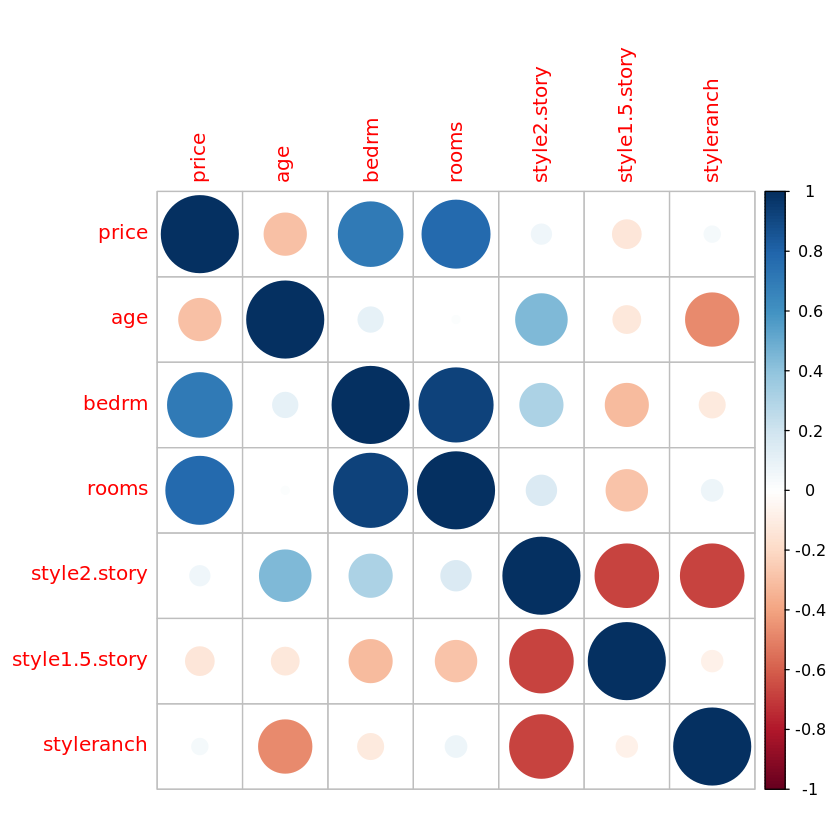

In [17]:
# Grafica
corrplot(corr_matrix, method = "circle")

-	Si la variable `sqfeet` fue seleccionada en el primer inciso, agregue una columna con el cuadrado de dicha variable y vuelva a realizar la regresión. Si no fue seleccionada, agréguela junto con su cuadrado. ¿Cómo cambian los resultados?

In [18]:
# Creacion de la nueva columna elevada al cuadrado
df["sqfeet_squared"] <- df["sqfeet"] ^ 2

In [19]:
# Modelo de regresion lineal con la nueva variable
new_lm <- lm(as.formula(paste(formula_str, "+ df$sqfeet_squared")), data = df)

In [20]:
# Modelo Stepwise con la nueva variable y resultados
new_step_model <- stepAIC(new_lm, direction = "both",
                          trace = FALSE)
summary(new_step_model)


Call:
lm(formula = df$price ~ unlist(df[9]) + df$sqfeet_squared, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.114 -28.372   0.964  30.406  80.482 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.008e+02  2.726e+01   11.03 4.26e-11 ***
unlist(df[9])     -1.698e+00  6.268e-01   -2.71    0.012 *  
df$sqfeet_squared  5.534e-05  3.701e-06   14.95 5.63e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.52 on 25 degrees of freedom
Multiple R-squared:  0.9084,	Adjusted R-squared:  0.9011 
F-statistic:   124 on 2 and 25 DF,  p-value: 1.051e-13


De acuerdo a los resultados anteriores, el modelo de regresión lineal es el siguiente:

$Y = 3.008 \times 10^{2}  -1.698 X_1 +  5.534 \times 10^5 X_2$

con un $R^2$ ajustada de $0.901$, es decir, el $90\%$ de la varianza de la variable dependiente puede ser explicada mediante las variables incluidas en el modelo. Además, nótese que se rechazan las hipótesis nulas de $X_1$ y $X_2$ (con un nivel de significancia $\alpha=0.05$), por lo que existe evidencia suficiente para concluir que las variables `age` y `sqfeet_squared` tienen un efecto significativo en el modelo. Cabe destacar que este modelo tiene un $R^2$ ajustada mejor que el anterior, utilizando dos variables diferentes.